## Packages

### Regular

In [1]:
# load the important libraries
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Visualization

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pylab
from scipy.stats import probplot

### Statistical

In [4]:
from scipy.stats import shapiro, normaltest, kstest, jarque_bera

### ML

In [5]:
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, recall_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.neighbors import KNeighborsClassifier

import pickle

## 1. Business and Data understanding

### Business

Customer churn in banking is when a customer closes their account and switches to another bank. Over their customer lifetime, customers generate fees on transactions, banking fees, credit cards, home loans, and personal loans. Churn is a problem, because the bank loses revenue, and it costs more to acquire a new customer than retaining an existing one.

**Objective(s):** Minimize the customer churn.

**Constraints:** Maximize revenue from existing customer and quality of bank services.

**Success Criteria**

- **Business Success Criteria**: understanding what keeps customers engaged is extremely valuable knowledge, as it can help you to develop your retention strategies. Reduce retention by 20%-30%

<!-- - **ML Success Criteria**: Achieve Silhoutte coefficient of atleast 0.6 -->

- **Economic Success Criteria**: bank can save 20% on marketing budget to acquire new customers.

**Proposed Plan:**
Classification of customer Churn

### Data Understanding

Data: 
   The customer details are obtained from the Bank and is publicly available.

Data Dictionary:
- Dataset contains 10000 customer details
- 18 features are recorded for each customer

- RowNumber —- corresponds to the record (row) number and has no effect on the output.
- CustomerId —- contains random values and has no effect on customer leaving the bank.
- Surname —- the surname of a customer has no impact on their decision to leave the bank.
- CreditScore —- can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- Geography —- a customer’s location can affect their decision to leave the bank.
- Gender —- it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- Age —- this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Tenure —- refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance —- also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- NumOfProducts -— refers to the number of products that a customer has purchased through the bank.
- HasCrCard —- denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- IsActiveMember -— active customers are less likely to leave the bank.
- EstimatedSalary -— as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- Exited —- whether or not the customer left the bank.

In [6]:
df = pd.read_csv('../../../../01_data/Customer-Churn-Records.csv')

df.shape

(10000, 18)

## 2. Data Preparation

### Data Preprocessing and Cleaning / Missing Values, Duplicates, and Typecasting

#### Missing Values Analysis

In [7]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

#### Handling Duplicates

In [8]:
df.duplicated(keep=False).sum()

0

#### Type Casting

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [10]:
df['Card Type'].value_counts()

DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: Card Type, dtype: int64

In [11]:
df['Card Type'] = df['Card Type'].map({'DIAMOND': 4, 'PLATINUM': 3, 'GOLD': 2, 'SILVER':1})

In [12]:
df['Exited'].value_counts()/df.shape[0]

0    0.7962
1    0.2038
Name: Exited, dtype: float64

In [13]:
df.Exited = df.Exited.astype('category')
# df['Satisfaction Score'] = df['Satisfaction Score'].astype('category')

### Exploratory Data Analysis / Overview and Descriptive Statistics

#### Overview

Since produced images are too heave and significantly slow down the notebook responsiveness, I just saved the images and if you can observe them [here](https://bayan2019.github.io/02_customer_churn_html/)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   RowNumber           10000 non-null  int64   
 1   CustomerId          10000 non-null  int64   
 2   Surname             10000 non-null  object  
 3   CreditScore         10000 non-null  int64   
 4   Geography           10000 non-null  object  
 5   Gender              10000 non-null  object  
 6   Age                 10000 non-null  int64   
 7   Tenure              10000 non-null  int64   
 8   Balance             10000 non-null  float64 
 9   NumOfProducts       10000 non-null  int64   
 10  HasCrCard           10000 non-null  int64   
 11  IsActiveMember      10000 non-null  int64   
 12  EstimatedSalary     10000 non-null  float64 
 13  Exited              10000 non-null  category
 14  Complain            10000 non-null  int64   
 15  Satisfaction Score  10000 non-null  i

In [15]:
df[['CustomerId', 'Surname', 'RowNumber']].nunique()

CustomerId    10000
Surname        2932
RowNumber     10000
dtype: int64

In [16]:
df[['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited', 'Complain', 'Card Type']].nunique()

Geography         3
Gender            2
HasCrCard         2
IsActiveMember    2
Exited            2
Complain          2
Card Type         4
dtype: int64

In [17]:
id_cols = ['CustomerId', 'Surname', 'RowNumber']

nominal_cat_cols = ['Geography', 'Gender']

ordinal_cat_cols = ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Complain', 'Card Type', 'Satisfaction Score']

numerical_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Point Earned']

In [18]:
# fig = px.histogram(df[['Satisfaction Score', 'Exited']].astype(str).value_counts().reset_index(name='count').sort_values('Satisfaction Score'), 
#             x='Satisfaction Score', y='count', color='Exited', color_discrete_map={'1': 'red', '0': 'blue'}, barnorm='percent')
# fig.show()
# fig.write_html(f"../02_customer_churn_html/figures/bar_satisfaction_score.html")

In [19]:
# fig = px.histogram(df[['Gender', 'Exited']].value_counts().reset_index(name='count').sort_values('Gender'), 
#             x='Gender', y='count', color='Exited', color_discrete_map={1: 'red', 0: 'blue'}, barnorm='percent')
# fig.show()
# fig.write_html(f"../02_customer_churn_html/figures/bar_gender.html")

In [20]:
# fig = px.histogram(df[['Geography', 'Exited']].value_counts().reset_index(name='count').sort_values('Geography'), 
#             x='Geography', y='count', color='Exited', color_discrete_map={1: 'red', 0: 'blue'}, barnorm='percent')
# fig.show()
# fig.write_html(f"../02_customer_churn_html/figures/bar_geography.html")

In [21]:
# fig = px.histogram(df[['Tenure', 'Exited']].value_counts().reset_index(name='count').sort_values('Tenure').astype(str), 
#             x='Tenure', y='count', color='Exited', color_discrete_map={'1': 'red', '0': 'blue'}, barnorm='percent')
# fig.show()
# fig.write_html(f"../02_customer_churn_html/figures/bar_tenure.html")

In [22]:
# fig = px.histogram(df[['NumOfProducts', 'Exited']].astype(str).value_counts().reset_index(name='count').sort_values('NumOfProducts'), 
#             x='NumOfProducts', y='count', color='Exited', color_discrete_map={'1': 'red', '0': 'blue'}, barnorm='percent')
# fig.show()
# fig.write_html(f"../02_customer_churn_html/figures/bar_number_of_products.html")

In [23]:
# fig = px.histogram(df[['HasCrCard', 'Exited']].astype(str).value_counts().reset_index(name='count').sort_values('HasCrCard'), 
#             x='HasCrCard', y='count', color='Exited', color_discrete_map={'1': 'red', '0': 'blue'}, barnorm='percent')
# fig.show()
# fig.write_html(f"../02_customer_churn_html/figures/bar_has_credit_card.html")

In [24]:
# fig = px.histogram(df[['IsActiveMember', 'Exited']].astype(str).value_counts().reset_index(name='count').sort_values('IsActiveMember'), 
#             x='IsActiveMember', y='count', color='Exited', color_discrete_map={'1': 'red', '0': 'blue'}, barnorm='percent')
# fig.show()
# fig.write_html(f"../02_customer_churn_html/figures/bar_is_active_member.html")

In [25]:
# fig = px.histogram(df[['Complain', 'Exited']].astype(str).value_counts().reset_index(name='count').sort_values('Complain'), 
#             x='Complain', y='count', color='Exited', color_discrete_map={'1': 'red', '0': 'blue'}, barnorm='percent')
# fig.show()
# fig.write_html(f"../02_customer_churn_html/figures/bar_complain.html")

In [26]:
# fig = px.histogram(df[['Card Type', 'Exited']].astype(str).value_counts().reset_index(name='count').sort_values('Card Type'), 
#             x='Card Type', y='count', color='Exited', color_discrete_map={'1': 'red', '0': 'blue'}, barnorm='percent')
# fig.update_layout(
#     xaxis = dict(
#         tickmode = 'array',
#         tickvals = [1, 2, 3, 4],
#         ticktext = ['SILVER', 'GOLD', 'PLATINUM', 'DIAMOND']
#     )
# )
# fig.show()
# fig.write_html(f"../02_customer_churn_html/figures/bar_card_type.html")

#### Descriptive statistics

##### First Moment Business Decision

Since produced images are too heave and significantly slow down the notebook responsiveness, I just saved the images and if you can observe them here [1st Moment Business Decision](https://bayan2019.github.io/02_customer_churn_html/web_pages/1st_moment/1st_moment.html)

In [27]:
df[numerical_cols].apply(lambda x: {'mean': x.mean(), 'median': x.median()}, axis=0, result_type='expand')

CreditScore      Age       Balance  EstimatedSalary  Point Earned
mean       650.5288  38.9218  76485.889288    100090.239881      606.5151
median     652.0000  37.0000  97198.540000    100193.915000      605.0000

In [28]:
# for column in numerical_cols:

#     bins = int(np.sqrt(len(set(df[column]))))

#     rb = (df[column].max()-df[column].min())/bins

#     max_size = max([df.loc[(df[column] >= df[column].min()+i*rb) & (df[column] < df[column].min()+(i+1)*rb), :].shape[0]
#                     for i in range(bins)])

#     fig = px.histogram(df, x=column, nbins=bins)
#     fig.add_vline(x=np.median(df[column]), line_dash = 'dash', line_color = '#6a040f')
#     fig.add_annotation({'x': df[column].median(),
#                         'y': max_size - max_size*0.01, 
#                         'text': 'median', 
#                         'font': {'size': 12, 'color': '#6a040f'},
#                         'xshift': 23, 'showarrow': False})
#     fig.add_vline(x=np.mean(df[column]), line_dash = 'dash', line_color = '#9d0208')
#     fig.add_annotation({'x': df[column].mean(),
#                         'y': max_size - max_size*0.05, 
#                         'text': 'mean', 
#                         'font': {'size': 12, 'color': '#9d0208'},
#                         'xshift': 23, 'showarrow': False})
#     fig.add_vline(x=df[column].mode()[0], line_dash = 'dash', line_color = '#d00000')
#     fig.add_annotation({'x': df[column].mode()[0],
#                         'y': max_size - max_size*0.1, 
#                         'text': 'mode', 
#                         'font': {'size': 12, 'color': '#d00000'},
#                         'xshift': 23, 'showarrow': False})
# #     fig.show()
#     fig.write_html(f"../02_customer_churn_html/figures/mmm_histogram_{column}.html")

In [29]:
# max_size = df['Card Type'].value_counts().iloc[0]
# fig = px.histogram(df, x='Card Type')
# fig.add_vline(x=np.median(df['Card Type']), line_dash = 'dash', line_color = '#6a040f')
# fig.add_annotation({'x': df['Card Type'].median(),
#                         'y': max_size - max_size*0.01, 
#                         'text': 'median', 
#                         'font': {'size': 12, 'color': '#6a040f'},
#                         'xshift': -28, 'showarrow': False, 'align': 'right'})
# fig.add_vline(x=np.mean(df['Card Type']), line_dash = 'dash', line_color = '#9d0208')
# fig.add_annotation({'x': df['Card Type'].mean(),
#                         'y': max_size - max_size*0.05, 
#                         'text': 'mean', 
#                         'font': {'size': 12, 'color': '#9d0208'},
#                         'xshift': 20, 'showarrow': False})
# fig.add_vline(x=df['Card Type'].mode()[0], line_dash = 'dash', line_color = '#d00000')
# fig.add_annotation({'x': df['Card Type'].mode()[0],
#                         'y': max_size - max_size*0.1, 
#                         'text': 'mode', 
#                         'font': {'size': 12, 'color': '#d00000'},
#                         'xshift': -18, 'showarrow': False})
# fig.update_layout(
#     xaxis = dict(
#         tickmode = 'array',
#         tickvals = [1, 2, 3, 4],
#         ticktext = ['SILVER', 'GOLD', 'PLATINUM', 'DIAMOND']
#     )
# )
# fig.write_html(f"../02_customer_churn_html/figures/mmm_histogram_card_type.html")
# fig.show()

In [30]:
# for column in ordinal_cat_cols:

#     max_size = df[column].value_counts().iloc[0]

#     fig = px.histogram(df, x=column)
#     fig.add_vline(x=np.median(df[column]), line_dash = 'dash', line_color = '#6a040f')
#     fig.add_annotation({'x': df[column].median(),
#                         'y': max_size - max_size*0.01, 
#                         'text': 'median', 
#                         'font': {'size': 12, 'color': '#6a040f'},
#                         'xshift': 23, 'showarrow': False})
#     fig.add_vline(x=np.mean(df[column]), line_dash = 'dash', line_color = '#9d0208')
#     fig.add_annotation({'x': df[column].mean(),
#                         'y': max_size - max_size*0.05, 
#                         'text': 'mean', 
#                         'font': {'size': 12, 'color': '#9d0208'},
#                         'xshift': 23, 'showarrow': False})
#     fig.add_vline(x=df[column].mode()[0], line_dash = 'dash', line_color = '#d00000')
#     fig.add_annotation({'x': df[column].mode()[0],
#                         'y': max_size - max_size*0.1, 
#                         'text': 'mode', 
#                         'font': {'size': 12, 'color': '#d00000'},
#                         'xshift': 23, 'showarrow': False})
    # fig.show()
    # fig.write_html(f"../02_customer_churn_html/figures/mmm_histogram_{column}.html")

In [31]:
df[ordinal_cat_cols].apply(lambda x: {'mean': x.mean(), 'median': x.median()}, axis=0, result_type='expand')

Tenure  NumOfProducts  HasCrCard  IsActiveMember  Complain  Card Type  \
mean    5.0128         1.5302     0.7055          0.5151    0.2044     2.5013   
median  5.0000         1.0000     1.0000          1.0000    0.0000     3.0000   

        Satisfaction Score  
mean                3.0138  
median              3.0000

In [32]:
df[nominal_cat_cols].apply(lambda x: {'mode': x.mode()[0], 'number of unique values': x.nunique()}, axis=0, result_type='expand')

Geography Gender
mode                       France   Male
number of unique values         3      2

In [33]:
df[ordinal_cat_cols].apply(lambda x: {'mode': x.mode()[0], 'number of unique values': x.nunique()}, axis=0, result_type='expand')

Tenure  NumOfProducts  HasCrCard  IsActiveMember  \
mode                          2              1          1               1   
number of unique values      11              4          2               2   

                         Complain  Card Type  Satisfaction Score  
mode                            0          4                   3  
number of unique values         2          4                   5

In [34]:
# for column in ordinal_cat_cols:

#     fig = px.pie(df[[column]].value_counts().reset_index(name='count').sort_values(column, ignore_index=True), 
#                  values='count', names=column, title=column)
#     fig.show()
#     fig.write_html(f"../02_customer_churn_html/figures/pie_{column}.html")

In [35]:
# fig = px.pie(df['Card Type'].map({
#     1: "SILVER", 2: "GOLD", 3: "PLATINUM", 4: "DIAMOND"
# }).value_counts().reset_index(name='count'), 
#                  values='count', names='index', title='Card Type')
# fig.show()
# fig.write_html(f"../02_customer_churn_html/figures/pie_card_type.html")

In [36]:
# for column in nominal_cat_cols:

#     fig = px.pie(df[column].value_counts().reset_index(name='count'), values='count', names='index', title=column)
#     fig.show()
#     fig.write_html(f"../02_customer_churn_html/figures/pie_{column}.html")

##### Second Moment Business Decision

Since produced images are too heave and significantly slow down the notebook responsiveness, I just saved the images and if you can observe them here [2nd Moment Business Decision](https://bayan2019.github.io/02_customer_churn_html/web_pages/2nd_moment/2nd_moment.html)

In [37]:
df[numerical_cols].apply(lambda x: {'variance': x.var(), 'std': x.std(), 'range': x.max()-x.min(),
                            'iqr': np.nanpercentile(x, 75) - np.nanpercentile(x, 25)}, axis=0, result_type='expand')

CreditScore         Age       Balance  EstimatedSalary  Point Earned
variance  9341.860157  109.994084  3.893436e+09     3.307457e+09  51042.032975
std         96.653299   10.487806  6.239741e+04     5.751049e+04    225.924839
range      500.000000   74.000000  2.508981e+05     1.999809e+05    881.000000
iqr        134.000000   12.000000  1.276442e+05     9.838614e+04    391.000000

In [38]:
# for column in numerical_cols:
#     bins = int(np.sqrt(len(set(df[column]))))
#     fig = px.histogram(df, x=column, nbins=bins, marginal='box')
#     # fig.show()
#     fig.write_html(f"../02_customer_churn_html/figures/iqr_histogram_{column}.html")

In [39]:
df[ordinal_cat_cols].apply(lambda x: {'variance': x.var(), 'std': x.std(), 'range': x.max()-x.min(),
                            'iqr': np.nanpercentile(x, 75) - np.nanpercentile(x, 25)}, axis=0, result_type='expand')

Tenure  NumOfProducts  HasCrCard  IsActiveMember  Complain  \
variance   8.364673       0.338322   0.207791        0.249797  0.162637   
std        2.892174       0.581654   0.455840        0.499797  0.403283   
range     10.000000       3.000000   1.000000        1.000000  1.000000   
iqr        4.000000       1.000000   1.000000        1.000000  0.000000   

          Card Type  Satisfaction Score  
variance   1.250723            1.976607  
std        1.118357            1.405919  
range      3.000000            4.000000  
iqr        2.000000            2.000000

##### Third Moment Business Decision

Since produced images are too heave and significantly slow down the notebook responsiveness, I just saved the images and if you can observe them here [3d Moment Business Decision](https://bayan2019.github.io/02_customer_churn_html/web_pages/3rd_moment/3rd_moment.html)

In [40]:
df[numerical_cols].skew()

CreditScore       -0.071607
Age                1.011320
Balance           -0.141109
EstimatedSalary    0.002085
Point Earned       0.008344
dtype: float64

In [41]:
# for column in numerical_cols:

#     fig = px.histogram(df, x=column, color='Exited', color_discrete_map={0: 'blue', 1: 'red'}, title=column,
#             nbins=int(np.sqrt(len(set(df[column])))), barmode='overlay', histnorm='probability density')
# #     fig.show()
#     fig.write_html(f"../02_customer_churn_html/figures/histogram_{column}.html")

In [42]:
df[ordinal_cat_cols].skew()

Tenure                0.010991
NumOfProducts         0.745568
HasCrCard            -0.901812
IsActiveMember       -0.060437
Complain              1.466263
Card Type            -0.000896
Satisfaction Score   -0.008936
dtype: float64

In [43]:
for column in ordinal_cat_cols:

    fig = px.histogram(df, x=column, color='Exited', color_discrete_map={0: 'blue', 1: 'red'}, title=column,
            nbins=int(np.sqrt(len(set(df[column])))), barmode='overlay', histnorm='probability density')
    fig.show()

##### Fourht Moment Business Decision

Since produced images are too heave and significantly slow down the notebook responsiveness, I just saved the images and if you can observe them here [4th Moment Business Decision](https://bayan2019.github.io/02_customer_churn_html/web_pages/4th_moment/4th_moment.html)

In [44]:
df[numerical_cols].kurt()

CreditScore       -0.425726
Age                1.395347
Balance           -1.489412
EstimatedSalary   -1.181518
Point Earned      -1.193781
dtype: float64

In [45]:
# for column in numerical_cols:
#     ax = sns.kdeplot(df, x=column, hue='Exited', palette={0: 'blue', 1: 'red'}, common_norm=False, fill=True)
#     fig = ax.get_figure()
#     fig.savefig(f"../02_customer_churn_html/figures/density_{column}.png")
#     fig.clf()

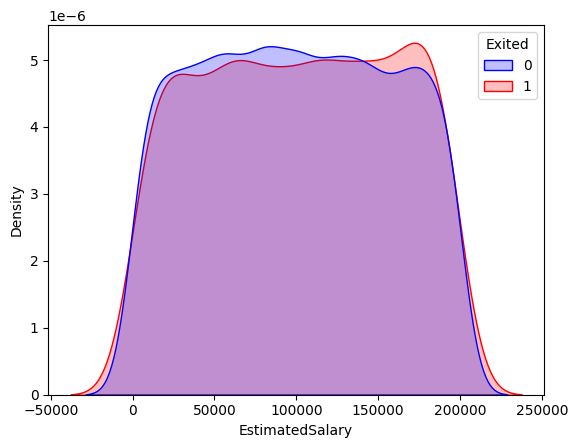

In [46]:
sns.kdeplot(df, x='EstimatedSalary', hue='Exited', palette={0: 'blue', 1: 'red'}, common_norm=False, fill=True)
plt.show()

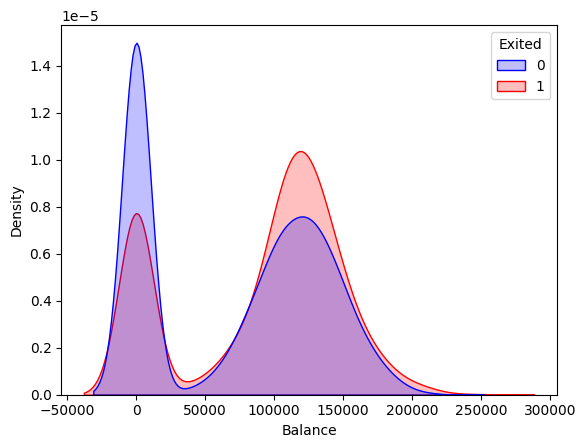

In [47]:
sns.kdeplot(df, x='Balance', hue='Exited', palette={0: 'blue', 1: 'red'}, common_norm=False, fill=True)
plt.show()

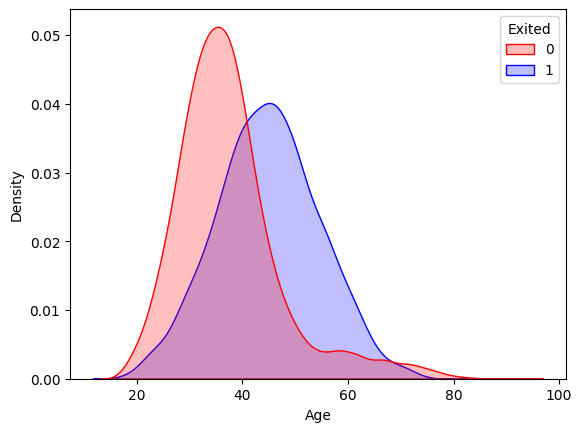

In [48]:
sns.kdeplot(df, x='Age', hue='Exited', palette={0: 'red', 1: 'blue'}, common_norm=False, fill=True)
plt.show()

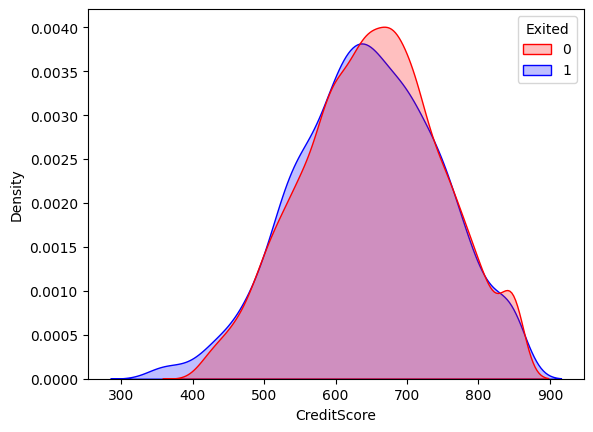

In [49]:
sns.kdeplot(df, x='CreditScore', hue='Exited', palette={0: 'red', 1: 'blue'}, common_norm=False, fill=True)
plt.show()

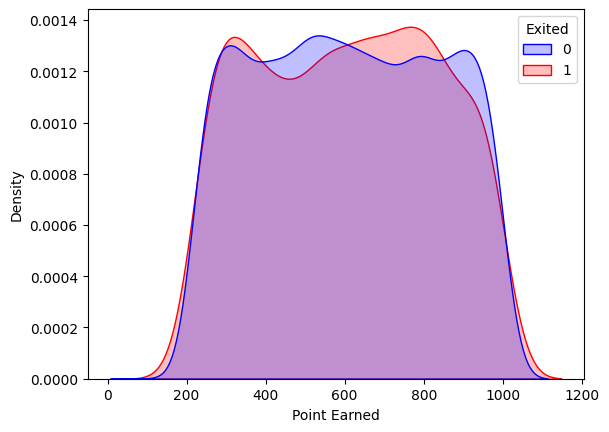

In [50]:
sns.kdeplot(df, x='Point Earned', hue='Exited', palette={0: 'blue', 1: 'red'}, common_norm=False, fill=True)
plt.show()

In [51]:
numerical_cols

['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Point Earned']

##### Descriptive Statistics

In [52]:
df[numerical_cols].describe()

CreditScore           Age        Balance  EstimatedSalary  \
count  10000.000000  10000.000000   10000.000000     10000.000000   
mean     650.528800     38.921800   76485.889288    100090.239881   
std       96.653299     10.487806   62397.405202     57510.492818   
min      350.000000     18.000000       0.000000        11.580000   
25%      584.000000     32.000000       0.000000     51002.110000   
50%      652.000000     37.000000   97198.540000    100193.915000   
75%      718.000000     44.000000  127644.240000    149388.247500   
max      850.000000     92.000000  250898.090000    199992.480000   

       Point Earned  
count  10000.000000  
mean     606.515100  
std      225.924839  
min      119.000000  
25%      410.000000  
50%      605.000000  
75%      801.000000  
max     1000.000000

In [53]:
df[ordinal_cat_cols].describe()

Tenure  NumOfProducts    HasCrCard  IsActiveMember      Complain  \
count  10000.000000   10000.000000  10000.00000    10000.000000  10000.000000   
mean       5.012800       1.530200      0.70550        0.515100      0.204400   
std        2.892174       0.581654      0.45584        0.499797      0.403283   
min        0.000000       1.000000      0.00000        0.000000      0.000000   
25%        3.000000       1.000000      0.00000        0.000000      0.000000   
50%        5.000000       1.000000      1.00000        1.000000      0.000000   
75%        7.000000       2.000000      1.00000        1.000000      0.000000   
max       10.000000       4.000000      1.00000        1.000000      1.000000   

          Card Type  Satisfaction Score  
count  10000.000000        10000.000000  
mean       2.501300            3.013800  
std        1.118357            1.405919  
min        1.000000            1.000000  
25%        2.000000            2.000000  
50%        3.000000            3.000000  
75%        4.000000            4.000000  
max        4.000000            5.000000

##### QQ Plots

In [54]:
# for column in numerical_cols:
#     probplot(df[column], dist = "norm", plot = pylab)
#     plt.title(column)

#     fig = plt.gcf()
#     fig.savefig(f"../02_customer_churn_html/figures/qqplot0_{column}.png")
#     fig.clf()

In [55]:
df[numerical_cols].apply(lambda x: {'Shapiro-Wilk Test': shapiro(x)[1], "D'Agostino's $K^2$ Test": normaltest(x)[1],
                            'Jarque-Bera Test': jarque_bera(x)[1], 'Kolmogorov-Smirnov Test': kstest(x, 'norm')[1]},
                            axis=0, result_type='expand')

CreditScore  Age        Balance  EstimatedSalary  \
Shapiro-Wilk Test        3.532838e-20  0.0   0.000000e+00     0.000000e+00   
D'Agostino's $K^2$ Test  1.434445e-29  0.0   0.000000e+00     0.000000e+00   
Jarque-Bera Test         5.206738e-19  0.0  1.328008e-208    4.902474e-127   
Kolmogorov-Smirnov Test  0.000000e+00  0.0   0.000000e+00     0.000000e+00   

                          Point Earned  
Shapiro-Wilk Test         0.000000e+00  
D'Agostino's $K^2$ Test   0.000000e+00  
Jarque-Bera Test         1.078247e-129  
Kolmogorov-Smirnov Test   0.000000e+00

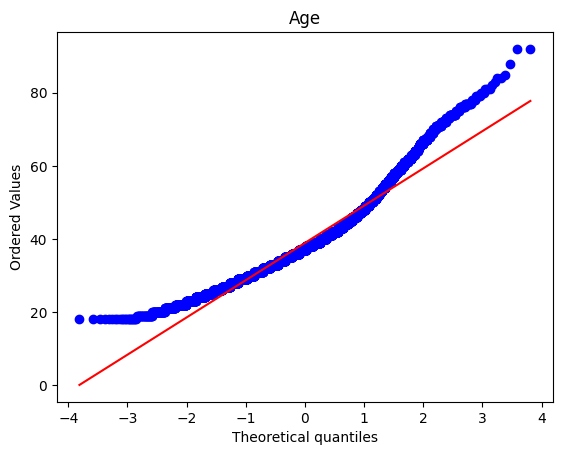

In [56]:
probplot(df['Age'], dist = "norm", plot = pylab)
plt.title('Age')
plt.show()

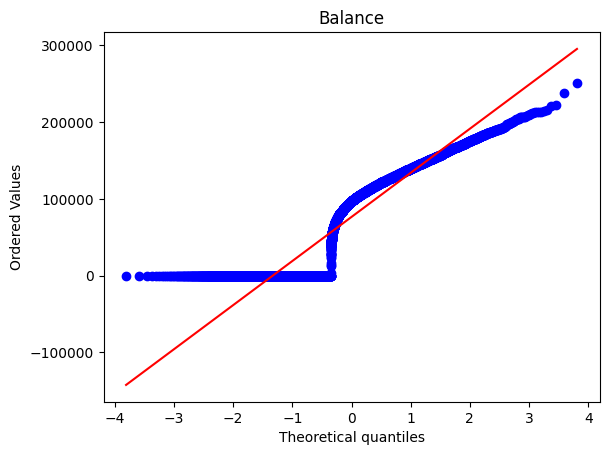

In [57]:
probplot(df['Balance'], dist = "norm", plot = pylab)
plt.title('Balance')
plt.show()

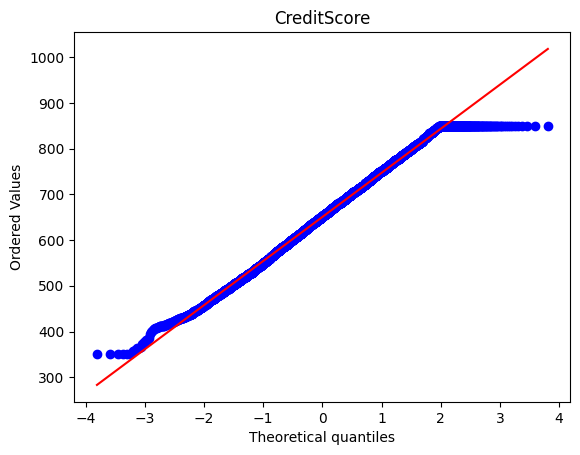

In [58]:
probplot(df['CreditScore'], dist = "norm", plot = pylab)
plt.title('CreditScore')
plt.show()

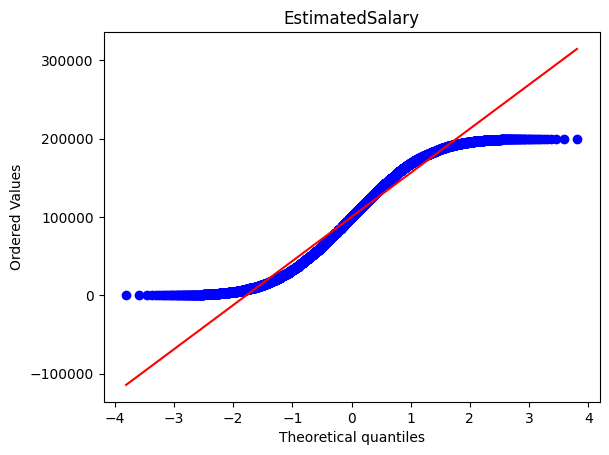

In [59]:
probplot(df['EstimatedSalary'], dist = "norm", plot = pylab)
plt.title('EstimatedSalary')
plt.show()

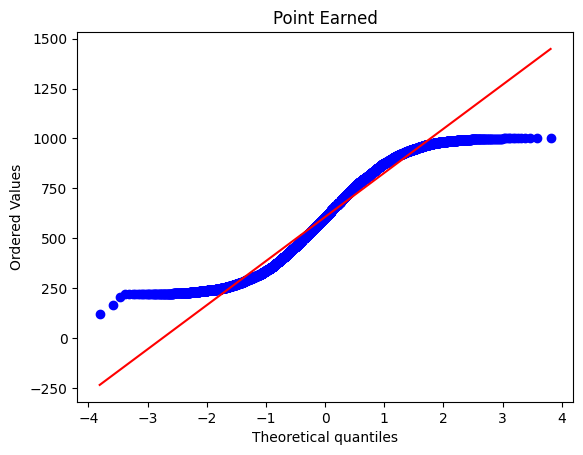

In [60]:
probplot(df['Point Earned'], dist = "norm", plot = pylab)
plt.title('Point Earned')
plt.show()

In [61]:
numerical_cols

['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Point Earned']

### Data Preprocessing and Cleaning / Drop columns and Outliers Analysis

#### Dropping irrelevant columns

In [62]:
for i in nominal_cat_cols:
    if i != "Exited":
        print(i)
        print(df[[i, 'Exited']].groupby(i).mean())
        print("----------------------------------------")

Geography
Empty DataFrame
Columns: []
Index: [France, Germany, Spain]
----------------------------------------
Gender
Empty DataFrame
Columns: []
Index: [Female, Male]
----------------------------------------


In [63]:
for i in ordinal_cat_cols:
    if i != "Exited":
        print(i)
        print(df[[i, 'Exited']].groupby(i).mean())
        print("----------------------------------------")

Tenure
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
----------------------------------------
NumOfProducts
Empty DataFrame
Columns: []
Index: [1, 2, 3, 4]
----------------------------------------
HasCrCard
Empty DataFrame
Columns: []
Index: [0, 1]
----------------------------------------
IsActiveMember
Empty DataFrame
Columns: []
Index: [0, 1]
----------------------------------------
Complain
Empty DataFrame
Columns: []
Index: [0, 1]
----------------------------------------
Card Type
Empty DataFrame
Columns: []
Index: [1, 2, 3, 4]
----------------------------------------
Satisfaction Score
Empty DataFrame
Columns: []
Index: [1, 2, 3, 4, 5]
----------------------------------------


In [64]:
# IsActiveMember: We don't have Enough information about this feature
# HasCrCard: Two groups has similar mean / churn rate

In [65]:
feature_drop = ['IsActiveMember', 'HasCrCard']

for element in feature_drop:
    ordinal_cat_cols.remove(element)

df.drop(feature_drop, axis=1, inplace=True)

In [66]:
df_processed = df.drop(id_cols, axis = 1)

In [67]:
df_processed.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   EstimatedSalary Exited  Complain  Satisfaction Score  Card Type  \
0        101348.88      1         1                   2          4   
1        112542.58      0         1                   3          4   
2        113931.57      1         1                   3          4   
3         93826.63      0         0                   5          2   
4         79084.10      0         0                   5          2   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

#### Outlier Analysis / Treatment

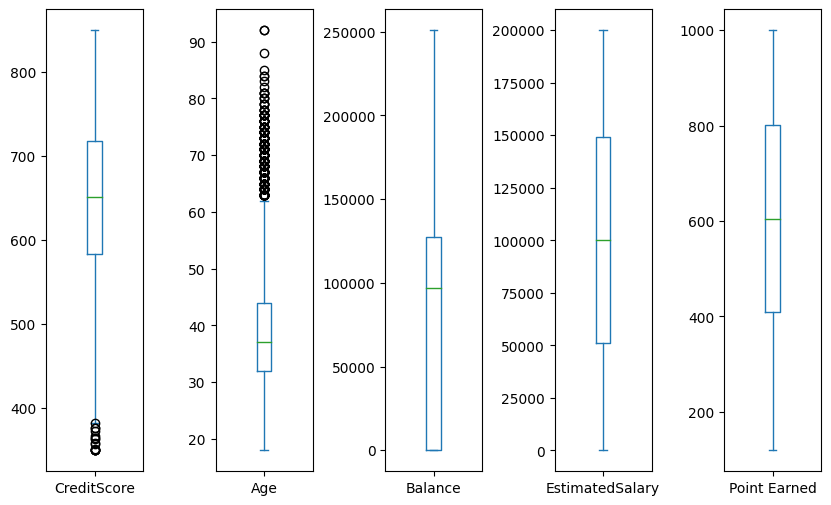

In [68]:
df[numerical_cols].plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6))

# increase spacing between subplots
plt.subplots_adjust(wspace = 0.75) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show() 

In [69]:
# df[numerical_cols].plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6))
# plt.subplots_adjust(wspace = 0.75)
# fig = plt.gcf()
# fig.savefig('../02_customer_churn_html/figures/boxplot_numerical.png')
# fig.clf()

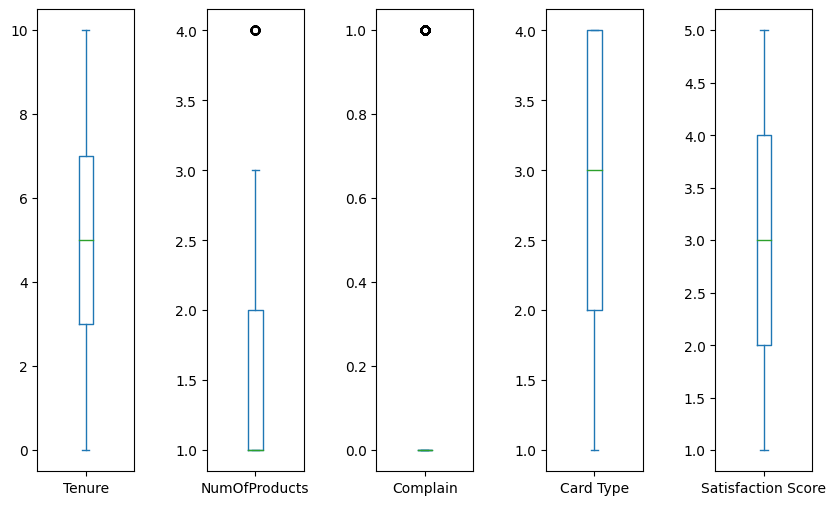

In [70]:
df[ordinal_cat_cols].plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6))

# increase spacing between subplots
plt.subplots_adjust(wspace = 0.75) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show() 

In [71]:
# df[ordinal_cat_cols].plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6))
# plt.subplots_adjust(wspace = 0.75)
# fig = plt.gcf()
# fig.savefig('../02_customer_churn_html/figures/boxplot_ordinal.png')
# fig.clf()

In [72]:
df1 = df_processed.copy()

In [73]:
# Winsorization for "SAT, Top10, Accept, SFRatio" column
winsor = Winsorizer(capping_method = 'iqr', # choose IQR rule boundary
                          tail = 'both', # cap left, right or both tails 
                          fold = 1.5,
                          variables = ['CreditScore'])

df1['CreditScore'] = winsor.fit_transform(df1[['CreditScore']]) # this is replacing the outliers to cap values

In [74]:
# Winsorization for "SAT, Top10, Accept, SFRatio" column
winsor = Winsorizer(capping_method = 'iqr', # choose IQR rule boundary
                          tail = 'both', # cap left, right or both tails 
                          fold = 1.5,
                          variables = ['Age'])

df1['Age'] = winsor.fit_transform(df1[['Age']]) # this is replacing the outliers to cap values

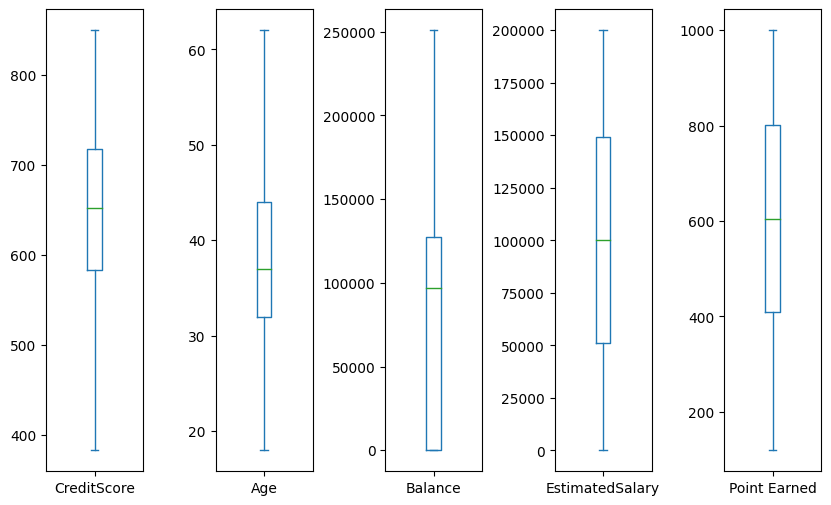

In [75]:
df1[numerical_cols].plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6))

# increase spacing between subplots
plt.subplots_adjust(wspace = 0.75) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show()

In [76]:
# df1[numerical_cols].plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6))
# plt.subplots_adjust(wspace = 0.75)
# fig = plt.gcf()
# fig.savefig('../02_customer_churn_html/figures/boxplot_numerical_without_outliers.png')
# fig.clf()

### Feature Engineering / One-hot encoding

In [77]:
df[nominal_cat_cols].nunique().sum()

5

In [78]:
cat_df = pd.get_dummies(df[nominal_cat_cols], drop_first = True)

In [79]:
df02 = pd.concat([df[numerical_cols+ordinal_cat_cols+['Exited']], cat_df], axis=1)
df12 = pd.concat([df1[numerical_cols+ordinal_cat_cols+['Exited']], cat_df], axis=1)

In [80]:
print(df02.shape, df12.shape)

(10000, 14) (10000, 14)


#### Feature Engineering on Categorical data

In [81]:
# LE_Gender = LabelEncoder()
# LE_Geography  = LabelEncoder()
# LE_Card_Type = LabelEncoder()

In [82]:
# df['Gender'] = LE_Gender.fit_transform(df['Gender'])
# df['Geography'] = LE_Geography.fit_transform(df['Geography'])
# df['Card Type'] = LE_Card_Type.fit_transform(df['Card Type'])

In [83]:
# pickle.dump(LE_Geography, open("LE_Geography.sav", 'wb'))
# pickle.dump(LE_Gender, open("LE_Gender.sav", 'wb'))
# pickle.dump(LE_Card_Type, open("LE_Card_Type.sav", 'wb'))

In [84]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  EstimatedSalary Exited  Complain  \
0       2       0.00              1        101348.88      1         1   
1       1   83807.86              1        112542.58      0         1   
2       8  159660.80              3        113931.57      1         1   
3       1       0.00              2         93826.63      0         0   
4       2  125510.82              1         79084.10      0         0   

   Satisfaction Score  Card Type  Point Earned  
0                   2          4           464  
1                   3          4           456  
2                   3          4           377  
3                   5          2           350  
4                   5          2           425

In [85]:
df = df.drop(id_cols, axis=1)

In [86]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   EstimatedSalary Exited  Complain  Satisfaction Score  Card Type  \
0        101348.88      1         1                   2          4   
1        112542.58      0         1                   3          4   
2        113931.57      1         1                   3          4   
3         93826.63      0         0                   5          2   
4         79084.10      0         0                   5          2   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

In [87]:
df.shape

(10000, 13)

### Exploratory Data Analysis / Graphical Presentation

#### Univariate

In [88]:
# for column in numerical_cols:

#     fig = px.histogram(df12, x=column, color='Exited', color_discrete_map={0: 'blue', 1: 'red'},
#             nbins=int(np.sqrt(len(set(df12[column])))), barmode='overlay', histnorm='probability density')
#     fig.write_html(f"../03_fedex_html/figures/histogram2_{column}.html")

##### QQ plots

In [89]:
params = {'axes.labelsize': 25}
pylab.rcParams.update(params)

In [90]:
for column in numerical_cols:

    plt.subplot(1, 2, 1)
    probplot(df02[column], dist = "norm", plot = pylab)
    pylab.rcParams.update(params)
    plt.title(f"{column} \n with Outliers", fontsize = 30)

    plt.subplot(1, 2, 2)
    probplot(df12[column], dist = "norm", plot = pylab)
    pylab.rcParams.update(params)
    plt.title(f"{column} \n without Outliers", fontsize = 30)

    plt.tight_layout()
    fig = plt.gcf()

    fig.set_figwidth(40)
    fig.savefig(f"../02_customer_churn_html/figures/qqplot_{column}.png")
    fig.clf()

<Figure size 4000x480 with 0 Axes>

In [91]:
df02[numerical_cols].apply(lambda x: {'Shapiro-Wilk Test': shapiro(x)[1], "D'Agostino's $K^2$ Test": normaltest(x)[1],
                            'Jarque-Bera Test': jarque_bera(x)[1], 'Kolmogorov-Smirnov Test': kstest(x, 'norm')[1]},
                            axis=0, result_type='expand')

CreditScore  Age        Balance  EstimatedSalary  \
Shapiro-Wilk Test        3.532838e-20  0.0   0.000000e+00     0.000000e+00   
D'Agostino's $K^2$ Test  1.434445e-29  0.0   0.000000e+00     0.000000e+00   
Jarque-Bera Test         5.206738e-19  0.0  1.328008e-208    4.902474e-127   
Kolmogorov-Smirnov Test  0.000000e+00  0.0   0.000000e+00     0.000000e+00   

                          Point Earned  
Shapiro-Wilk Test         0.000000e+00  
D'Agostino's $K^2$ Test   0.000000e+00  
Jarque-Bera Test         1.078247e-129  
Kolmogorov-Smirnov Test   0.000000e+00

In [92]:
df12[numerical_cols].apply(lambda x: {'Shapiro-Wilk Test': shapiro(x)[1], "D'Agostino's $K^2$ Test": normaltest(x)[1],
                            'Jarque-Bera Test': jarque_bera(x)[1], 'Kolmogorov-Smirnov Test': kstest(x, 'norm')[1]},
                            axis=0, result_type='expand')

CreditScore            Age        Balance  \
Shapiro-Wilk Test        1.041017e-20   1.401298e-45   0.000000e+00   
D'Agostino's $K^2$ Test  3.079100e-33  8.659501e-123   0.000000e+00   
Jarque-Bera Test         1.753199e-20  1.709252e-144  1.328008e-208   
Kolmogorov-Smirnov Test  0.000000e+00   0.000000e+00   0.000000e+00   

                         EstimatedSalary   Point Earned  
Shapiro-Wilk Test           0.000000e+00   0.000000e+00  
D'Agostino's $K^2$ Test     0.000000e+00   0.000000e+00  
Jarque-Bera Test           4.902474e-127  1.078247e-129  
Kolmogorov-Smirnov Test     0.000000e+00   0.000000e+00

In [93]:
params1 = {'axes.labelsize': 15}

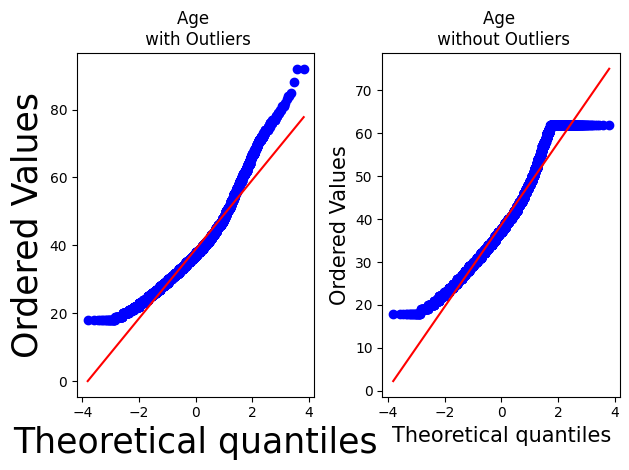

<Figure size 9000x480 with 0 Axes>

In [94]:
plt.subplot(1, 2, 1)
probplot(df02.Age, dist = "norm", plot = pylab)
pylab.rcParams.update(params1)
plt.title('Age \n with Outliers')
# plt.show()

plt.subplot(1, 2, 2)
probplot(df12.Age, dist = "norm", plot = pylab)
pylab.rcParams.update(params1)
plt.title('Age \n without Outliers')

plt.tight_layout()
plt.figure().set_figwidth(90)
plt.show()

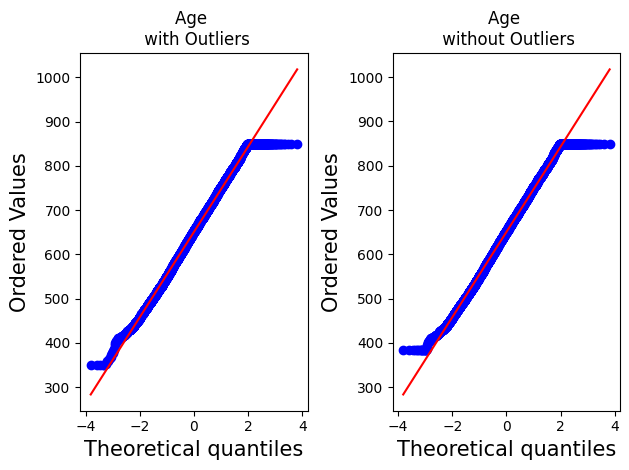

<Figure size 9000x480 with 0 Axes>

In [95]:
plt.subplot(1, 2, 1)
probplot(df02.CreditScore, dist = "norm", plot = pylab)
pylab.rcParams.update(params1)
plt.title('Age \n with Outliers')
# plt.show()

plt.subplot(1, 2, 2)
probplot(df12.CreditScore, dist = "norm", plot = pylab)
pylab.rcParams.update(params1)
plt.title('Age \n without Outliers')

plt.tight_layout()
plt.figure().set_figwidth(90)
plt.show()

#### Bivariate

##### Heatmap

In [96]:
df02.Exited = df02.Exited.astype(int)

corr_df = df02[numerical_cols+ordinal_cat_cols+['Exited']].corr()

In [97]:
# sns.heatmap(corr_df, xticklabels = corr_df.columns, yticklabels = corr_df.columns, cmap = "coolwarm")
# plt.title('Heat Map of Correlation Matrix')
# plt.tight_layout()
# fig = plt.gcf()
# fig.savefig('../02_customer_churn_html/figures/heatmap.png')
# fig.clf()

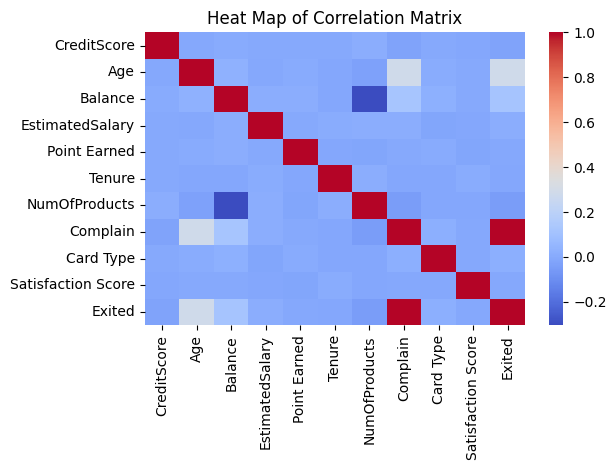

In [98]:
sns.heatmap(corr_df, xticklabels = corr_df.columns, yticklabels = corr_df.columns, cmap = "coolwarm")
plt.title('Heat Map of Correlation Matrix')
plt.tight_layout()
plt.show()

In [99]:
numerical_cols

['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Point Earned']

##### Scatter Plot

In [100]:
df02.Exited = df02.Exited.astype('category')

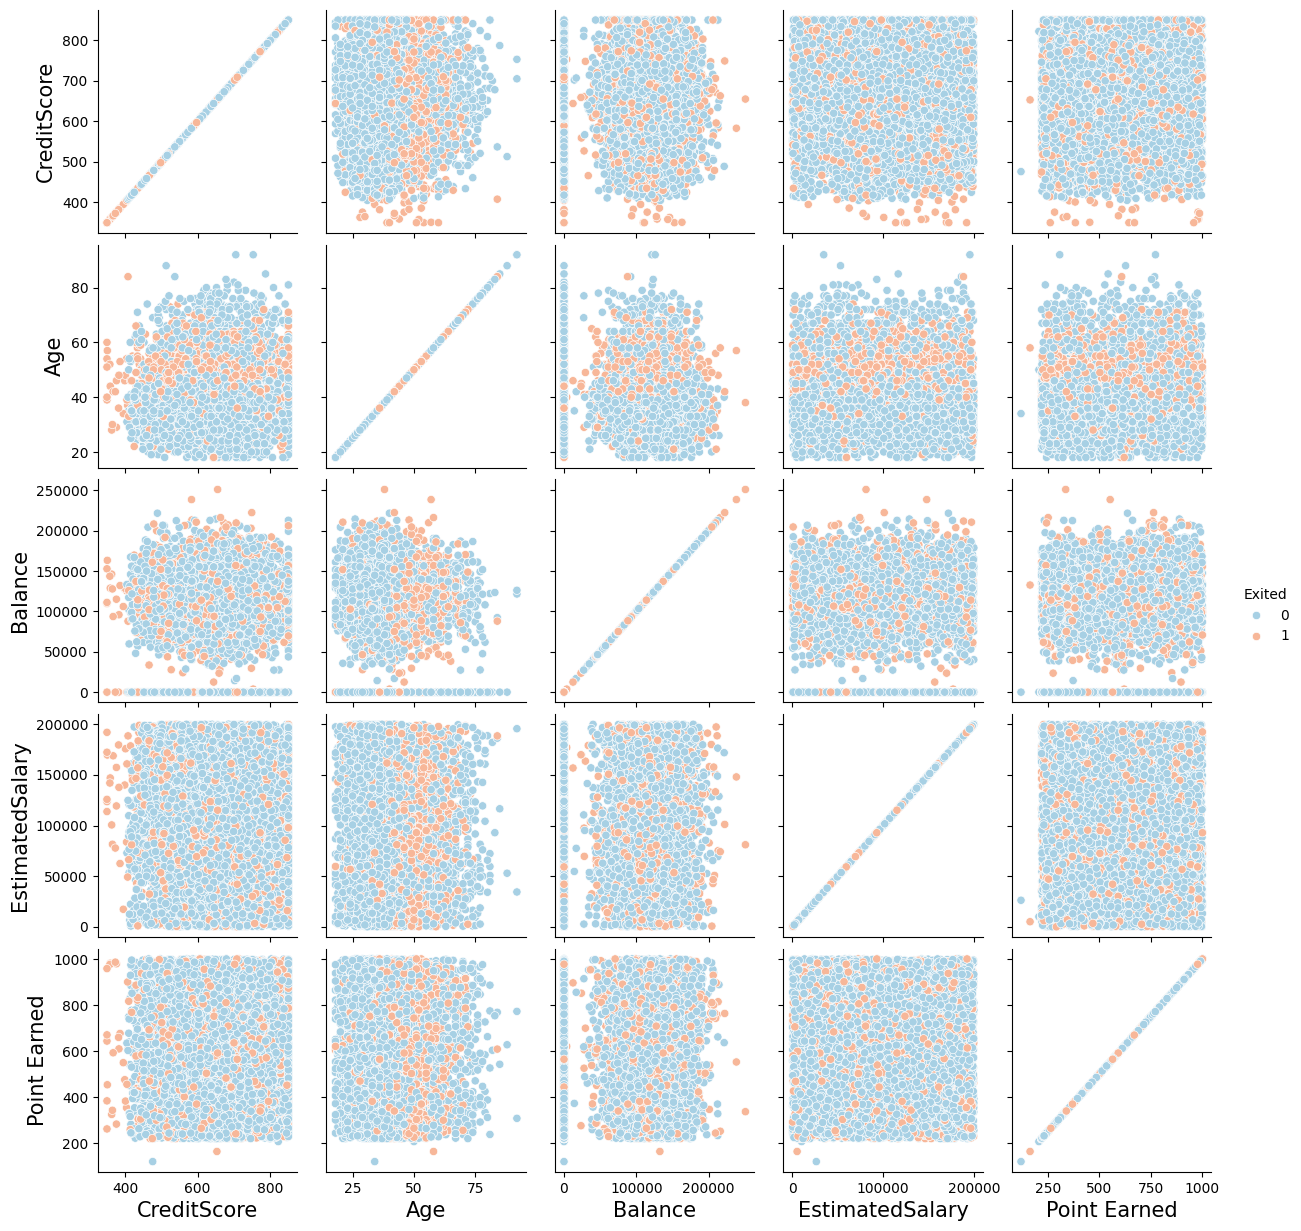

In [101]:
sns.pairplot(df02[numerical_cols+['Exited']], hue='Exited', palette='RdBu_r', diag_kind=None)
plt.show()
# fig = plt.gcf()
# fig.savefig('../02_customer_churn_html/figures/pairplot_numerical_cols.png')
# fig.clf()

In [102]:
# fig = px.scatter_matrix(df02,
#     dimensions=numerical_cols, color_discrete_map={1: 'red', 0: 'blue'},
#     color="Exited", opacity=0.3)
# fig.update_layout(height=800)
# fig.show()
# fig.write_html(f"../02_customer_churn_html/figures/scatter_numerical_cols.html")

In [103]:
df12.Exited = df12.Exited.astype('category')

In [104]:
fig = px.scatter_matrix(df12,
    dimensions=numerical_cols, color_discrete_map={1: 'red', 0: 'blue'},
    color="Exited", opacity=0.3)
fig.update_layout(height=800)
fig.show()

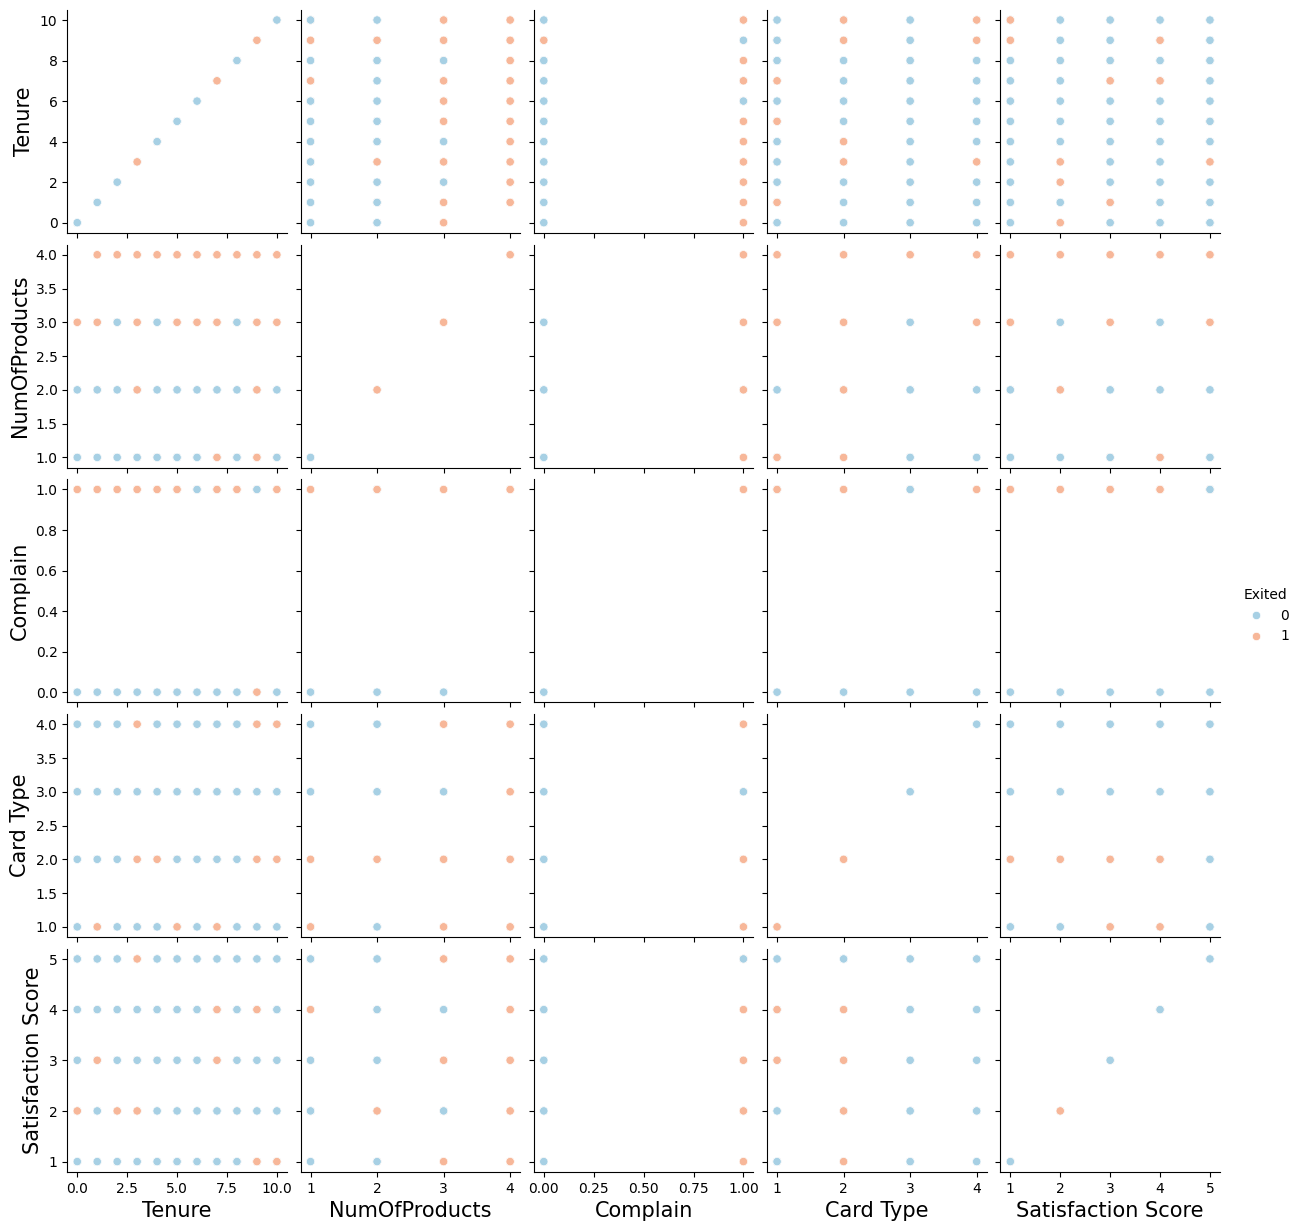

In [105]:
sns.pairplot(df02[ordinal_cat_cols+['Exited']], hue='Exited', palette='RdBu_r', diag_kind=None)
plt.show()
# fig = plt.gcf()
# fig.savefig('../02_customer_churn_html/figures/pairplot_ordinal_cat_cols.png')
# fig.clf()

In [106]:
# fig = px.scatter_matrix(df02,
#     dimensions=ordinal_cat_cols, color_discrete_map={1: 'red', 0: 'blue'},
#     color="Exited", opacity=0.3)
# fig.update_layout(height=900)
# fig.show()
# fig.write_html(f"../02_customer_churn_html/figures/scatter_ordinal_cat_cols.html")

## 3. Model Building

In [107]:
X = df02.drop("Exited", axis = 1)

y = df02['Exited']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [109]:
steps_knn = [('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())]
pipeline_knn = Pipeline(steps_knn)

param_grid_knn = {'knn__n_neighbors': np.arange(1, 50)}
knn_scaled = GridSearchCV(pipeline_knn, param_grid=param_grid_knn, cv=4)
knn_scaled.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [110]:
steps_lr = [('scaler', MinMaxScaler()), ('logreg', LogisticRegression())]
pipeline_lr = Pipeline(steps_lr)

param_grid_lr = {'logreg__C' : range(1, 5), 'logreg__max_iter' : range(100, 500, 50), 'logreg__penalty': ['l1', 'l2', 'elasticnet']}
lr_scaled = GridSearchCV(pipeline_lr, param_grid=param_grid_lr, cv=4)
lr_scaled.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'logreg__C': range(1, 5),
                         'logreg__max_iter': range(100, 500, 50),
                         'logreg__penalty': ['l1', 'l2', 'elasticnet']})

In [111]:
steps_tree = [('scaler', MinMaxScaler()), ('dt', DecisionTreeClassifier())]
pipeline_tree = Pipeline(steps_tree)

param_grid_tree = {"dt__max_depth": [3, 4, 5, 6, 7, 8, None], "dt__max_features": np.arange(1, 30),
                 "dt__min_samples_leaf": [0.04, 0.06, 0.08, 0.1, 1, 2, 4, 6, 8], "dt__criterion": ["gini", "entropy"]}
tree_scaled = GridSearchCV(pipeline_tree, param_grid=param_grid_tree, cv=4)
tree_scaled.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [3, 4, 5, 6, 7, 8, None],
                         'dt__max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'dt__min_samples_leaf': [0.04, 0.06, 0.08, 0.1, 1, 2,
                                                  4, 6, 8]})

In [112]:
steps_random_forest = [('scaler', MinMaxScaler()), ('rf', RandomForestClassifier())]
pipeline_random_forest = Pipeline(steps_random_forest)

param_grid_rf = {"rf__max_depth": [2, 8, 16], "rf__n_estimators": [64, 128, 256]}
random_forest_scaled = GridSearchCV(pipeline_random_forest, param_grid=param_grid_rf, cv=4)
random_forest_scaled.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': [2, 8, 16],
                         'rf__n_estimators': [64, 128, 256]})

In [113]:
steps_SVC = [('scaler', MinMaxScaler()), ('SVM', SVC())]
pipeline_SVC = Pipeline(steps_SVC)

param_grid_SVM = {'SVM__C':[1,10,100,1000], 'SVM__gamma':[1,0.1,0.001,0.0001], 'SVM__kernel':['linear','rbf']}
#param_grid_SVM = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
SVC_scaled = GridSearchCV(pipeline_SVC, param_grid=param_grid_SVM, cv=4)
SVC_scaled.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('SVM', SVC())]),
             param_grid={'SVM__C': [1, 10, 100, 1000],
                         'SVM__gamma': [1, 0.1, 0.001, 0.0001],
                         'SVM__kernel': ['linear', 'rbf']})

In [114]:
steps_MLP = [('scaler', MinMaxScaler()), ('MLP', MLPClassifier(max_iter=100))]
pipeline_MLP = Pipeline(steps_MLP)

param_grid_MLP = {
    'MLP__hidden_layer_sizes': [(10,30,10),(20,)],
    'MLP__activation': ['tanh', 'relu'],
    'MLP__solver': ['sgd', 'adam'],
    'MLP__alpha': [0.0001, 0.05],
    'MLP__learning_rate': ['constant','adaptive'],
}
MLP_scaled = GridSearchCV(pipeline_MLP, param_grid=param_grid_MLP, cv=4)
MLP_scaled.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('MLP', MLPClassifier(max_iter=100))]),
             param_grid={'MLP__activation': ['tanh', 'relu'],
                         'MLP__alpha': [0.0001, 0.05],
                         'MLP__hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'MLP__learning_rate': ['constant', 'adaptive'],
                         'MLP__solver': ['sgd', 'adam']})

## Model Evaluation

In [115]:
# dir(lr_scaled)

In [116]:
models = {'knn': {'model': knn_scaled}, 'logistic': {'model': lr_scaled}, 'dtree': {'model': tree_scaled},
          'rf': {'model': random_forest_scaled}, 'svc': {'model': SVC_scaled}, 'mlp': {'model': MLP_scaled}}

In [117]:
for key in models.keys():
    # models[key]['score'] = models[key]['model'].score(X_test, y_test)
    print(models[key]['model'].best_params_)

{'knn__n_neighbors': 3}
{'logreg__C': 1, 'logreg__max_iter': 100, 'logreg__penalty': 'l2'}
{'dt__criterion': 'gini', 'dt__max_depth': 3, 'dt__max_features': 5, 'dt__min_samples_leaf': 6}
{'rf__max_depth': 8, 'rf__n_estimators': 64}
{'SVM__C': 1, 'SVM__gamma': 1, 'SVM__kernel': 'linear'}
{'MLP__activation': 'tanh', 'MLP__alpha': 0.0001, 'MLP__hidden_layer_sizes': (10, 30, 10), 'MLP__learning_rate': 'constant', 'MLP__solver': 'sgd'}


In [118]:
for key in models.keys():
    # models[key]['score'] = models[key]['model'].score(X_test, y_test)
    y_pred = models[key]['model'].predict(X_test)
    models[key]['accuracy_score'] = accuracy_score(y_test, y_pred)
    models[key]['confusion_matrix'] = confusion_matrix(y_test, y_pred)
    models[key]['classification_report'] = classification_report(y_test, y_pred)

In [119]:
for key in models.keys():
    print(f'''{key}: 
            accuracy score: {models[key]['accuracy_score']}
            confusion matrix {models[key]['confusion_matrix']}
            classification report {models[key]['classification_report']}
''')

knn: 
            accuracy score: 0.9986666666666667
            confusion matrix [[2387    2]
 [   2  609]]
            classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2389
           1       1.00      1.00      1.00       611

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000


logistic: 
            accuracy score: 0.9986666666666667
            confusion matrix [[2387    2]
 [   2  609]]
            classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2389
           1       1.00      1.00      1.00       611

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000


dtree: 
            accuracy score: 0.998666666666666

In [120]:
# 1: left the bank, 0: not left

In [121]:
# cm_display = ConfusionMatrixDisplay(models['logistic']['confusion_matrix'], display_labels=[False, True])
# cm_display.plot()
# fig = plt.gcf()
# fig.savefig('../02_customer_churn_html/figures/confusion_matrix.png')
# fig.clf()

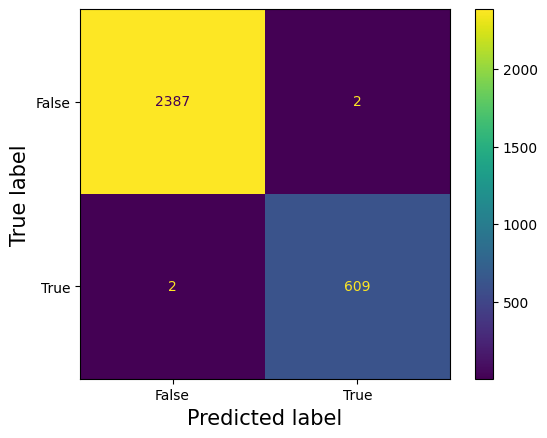

In [122]:
cm_display = ConfusionMatrixDisplay(models['logistic']['confusion_matrix'], display_labels=[False, True])

cm_display.plot()
plt.show()


In [123]:
pd.DataFrame({"Feature": models['logistic']['model'].feature_names_in_,
              "coef": models['logistic']['model'].best_estimator_.steps[1][1].coef_.reshape(-1, )}).sort_values(by='coef', ascending=False)

# pd.DataFrame({"Feature": models['logistic']['model'].feature_names_in_,
#               "coeff": models['logistic']['model'].best_estimator_.named_steps['clf'].coef_.reshape(-1, )})

Feature       coef
7             Complain  10.342504
1                  Age   1.485108
2              Balance   0.204273
3      EstimatedSalary   0.096262
10   Geography_Germany   0.058594
0          CreditScore   0.033115
11     Geography_Spain  -0.035626
5               Tenure  -0.082414
8            Card Type  -0.105283
12         Gender_Male  -0.125277
6        NumOfProducts  -0.193511
9   Satisfaction Score  -0.349586
4         Point Earned  -0.496237

In [124]:
# proba = LR.predict_proba(X_test_STD)[:,1]

## Saving the model in local after model selection

In [125]:
# import pickle
# filename = "Logistic_regression_model.sav"
# pickle.dump(LR, open(filename, 'wb'))